## LV_1. [카카오 인턴] 키패드 누르기

스마트폰 전화 키패드의 각 칸에 다음과 같이 숫자들이 적혀 있습니다.

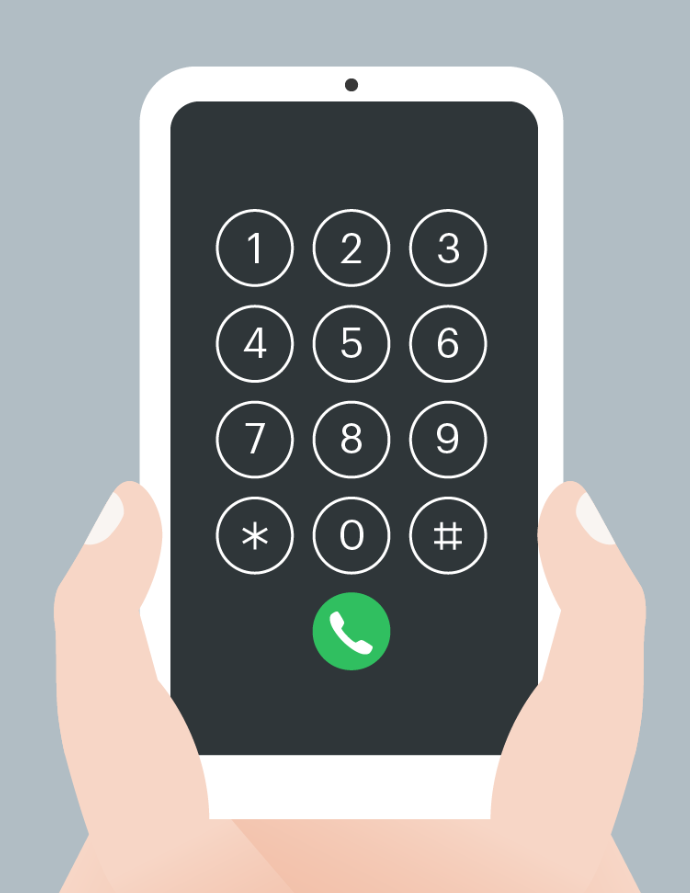

이 전화 키패드에서 왼손과 오른손의 엄지손가락만을 이용해서 숫자만을 입력하려고 합니다.
맨 처음 왼손 엄지손가락은 * 키패드에 오른손 엄지손가락은 # 키패드 위치에서 시작하며, 엄지손가락을 사용하는 규칙은 다음과 같습니다.

- 1. 엄지손가락은 상하좌우 4가지 방향으로만 이동할 수 있으며 키패드 이동 한 칸은 거리로 1에 해당합니다.
- 2. 왼쪽 열의 3개의 숫자 1, 4, 7을 입력할 때는 왼손 엄지손가락을 사용합니다.
- 3. 오른쪽 열의 3개의 숫자 3, 6, 9를 입력할 때는 오른손 엄지손가락을 사용합니다.
- 4. 가운데 열의 4개의 숫자 2, 5, 8, 0을 입력할 때는 두 엄지손가락의 현재 키패드의 위치에서 더 가까운 엄지손가락을 사용합니다.
- 4-1. 만약 두 엄지손가락의 거리가 같다면, 오른손잡이는 오른손 엄지손가락, 왼손잡이는 왼손 엄지손가락을 사용합니다.

순서대로 누를 번호가 담긴 배열 numbers, 왼손잡이인지 오른손잡이인 지를 나타내는 문자열 hand가 매개변수로 주어질 때, 각 번호를 누른 엄지손가락이 왼손인 지 오른손인 지를 나타내는 연속된 문자열 형태로 return 하도록 solution 함수를 완성해주세요.

### 제한사항

- numbers 배열의 크기는 1 이상 1,000 이하입니다.
- numbers 배열 원소의 값은 0 이상 9 이하인 정수입니다.
- hand는 "left" 또는 "right" 입니다.
    - "left"는 왼손잡이, "right"는 오른손잡이를 의미합니다.
- 왼손 엄지손가락을 사용한 경우는 L, 오른손 엄지손가락을 사용한 경우는 R을 순서대로 이어붙여 문자열 형태로 return 해주세요.

### 입출력 예

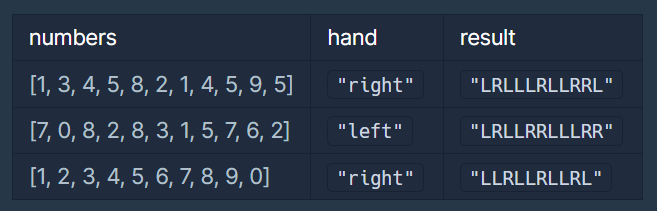

### 입출력 예 #1

순서대로 눌러야 할 번호가 [1, 3, 4, 5, 8, 2, 1, 4, 5, 9, 5]이고, 오른손잡이입니다.

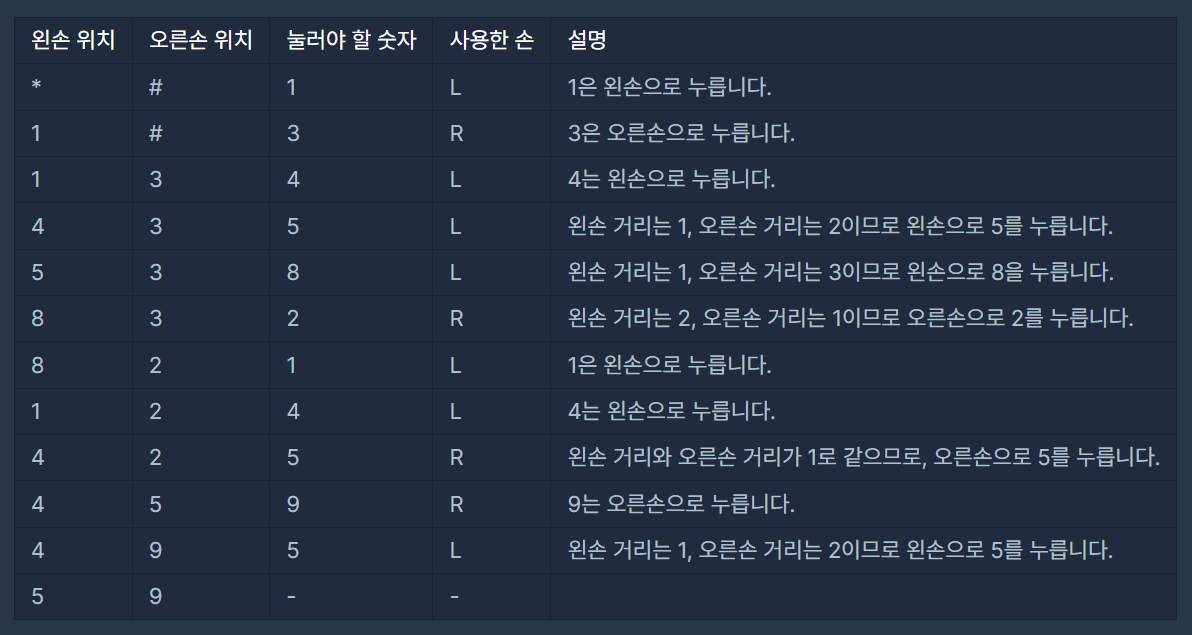

따라서 "LRLLLRLLRRL"를 return 합니다.

### 입출력 예 #2

왼손잡이가 [7, 0, 8, 2, 8, 3, 1, 5, 7, 6, 2]를 순서대로 누르면 사용한 손은 "LRLLRRLLLRR"이 됩니다.

### 입출력 예 #3

오른손잡이가 [1, 2, 3, 4, 5, 6, 7, 8, 9, 0]를 순서대로 누르면 사용한 손은 "LLRLLRLLRL"이 됩니다.

### 내 풀이

In [57]:
numbers = [1,2,3,4,5,6,7,8,9,0]	
hand = "right"

def solution(numbers, hand):
    R_current = "#"
    L_current = "*"
    answer = ''
    key_dict = {
    1:(0,0),2:(0,1),3:(0,2),
    4:(1,0),5:(1,1),6:(1,2),
    7:(2,0),8:(2,1),9:(2,2),
    '*':(3,0),0:(3,1),'#':(3,2)
    }

    for i in numbers:
        if i in [1, 4, 7]:
            answer += 'L'
            L_current = i
        elif i in [3, 6, 9]:
            answer += 'R'
            R_current = i
        elif i in [2, 5, 8, 0]:
            R_distance = 0
            L_distance = 0
            for j in range(2):
                R_distance += abs(key_dict[R_current][j] - key_dict[i][j])
                L_distance += abs(key_dict[L_current][j] - key_dict[i][j])
            if R_distance < L_distance:
                answer += 'R'
                R_current = i
            elif R_distance > L_distance:
                answer += 'L'
                L_current = i
            elif R_distance == L_distance:
                if hand == "right":
                    answer += 'R'
                    R_current = i
                elif hand == "lift":
                    answer += 'L'
                    L_current = i
    return answer

solution(numbers, hand)

'LLRLLRLLRL'

### 다른 사람 풀이

In [56]:
# 내 풀이와 완전 동일하군....
numbers = [1,2,3,4,5,6,7,8,9,0]	
hand = "right"

def solution(numbers, hand):
    answer = ''
    key_dict = {1:(0,0),2:(0,1),3:(0,2),
                4:(1,0),5:(1,1),6:(1,2),
                7:(2,0),8:(2,1),9:(2,2),
                '*':(3,0),0:(3,1),'#':(3,2)}

    left = [1,4,7]
    right = [3,6,9]
    lhand = '*'
    rhand = '#'
    for i in numbers:
        if i in left:
            answer += 'L'
            lhand = i
        elif i in right:
            answer += 'R'
            rhand = i
        else:
            curPos = key_dict[i]
            lPos = key_dict[lhand]
            rPos = key_dict[rhand]
            ldist = abs(curPos[0]-lPos[0]) + abs(curPos[1]-lPos[1])
            rdist = abs(curPos[0]-rPos[0]) + abs(curPos[1]-rPos[1])

            if ldist < rdist:
                answer += 'L'
                lhand = i
            elif ldist > rdist:
                answer += 'R'
                rhand = i
            else:
                if hand == 'left':
                    answer += 'L'
                    lhand = i
                else:
                    answer += 'R'
                    rhand = i

    return answer

solution(numbers, hand)

'LLRLLRLLRL'